In [1]:
import pandas as pd 
import io 
from google.colab import files 
# Metodo para cargar los datasets facilmente 
def upload_files (): 
  uploaded = files.upload() 
  for fn in uploaded.keys(): 
    print('User uploaded file "{name}" with length {length} bytes'.format( 
        name=fn, length=len(uploaded[fn]))) 
    df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8'))) 
    return df

In [2]:
df = upload_files()

Saving df.csv to df.csv
User uploaded file "df.csv" with length 8679247 bytes


In [15]:
# Se comprueban si el dataset contiene datos nulos
df.isnull().sum()

Property Class                0
Tax Year                      0
Town Code                     0
Type of Residence             0
Wall Material                 0
Roof Material                 0
Rooms                         0
Bedrooms                      0
Basement                      0
Basement Finish               0
Central Heating               0
Central Air                   0
Fireplaces                    0
Attic Type                    0
Half Baths                    0
Design Plan                   0
Cathedral Ceiling             0
Construction Quality          0
Site Desireability            0
Porch                         0
Building Square Feet          0
Repair Condition              0
Number of Commercial Units    0
Sale Price                    0
Multi Property Indicator      0
Full Baths                    0
Age                           0
Use                           0
OHare Noise                   0
Floodplain                    0
Near Major Road               0
Location

In [4]:
df = df.drop(["Indice"], axis = 1)

In [5]:
df["OHare Noise"] = df["OHare Noise"].fillna(0)
df["Floodplain"] = df["Floodplain"].fillna(0)
df["Near Major Road"] = df["Near Major Road"].fillna(0)
df["Location Factor"] = df["Location Factor"].fillna(1)
df.isnull().sum()

Property Class                0
Tax Year                      0
Town Code                     0
Type of Residence             0
Wall Material                 0
Roof Material                 0
Rooms                         0
Bedrooms                      0
Basement                      0
Basement Finish               0
Central Heating               0
Central Air                   0
Fireplaces                    0
Attic Type                    0
Half Baths                    0
Design Plan                   0
Cathedral Ceiling             0
Construction Quality          0
Site Desireability            0
Porch                         0
Building Square Feet          0
Repair Condition              0
Number of Commercial Units    0
Sale Price                    0
Multi Property Indicator      0
Full Baths                    0
Age                           0
Use                           0
OHare Noise                   0
Floodplain                    0
Near Major Road               0
Location

In [6]:
## PRUEBA PARRA SVM
from sklearn.model_selection import train_test_split
df_train, df_test, y_train, y_test = train_test_split(df, df["Sale Price"], train_size=0.75, random_state=0)

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
from matplotlib.pyplot import figure
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error



# constructor
regressor = DecisionTreeRegressor(max_depth=10, random_state=0)

# fit and predict
regressor.fit(df_train.drop(['Sale Price'], axis=1), y = df_train['Sale Price'])
y_pred = regressor.predict(df_test.drop(['Sale Price'], axis = 1))
# Se evalua el modelo a partir del MAE
mae = mean_absolute_error(df_test['Sale Price'], y_pred)
#mse = np.square(np.subtract(df_test['Sale Price'], y_pred)).mean()

print("mae:")
print('mae ', mae)

#print(regressor.score(f_test['Sale Price'], y_pred))
print(regressor.score(df_train.drop(['Sale Price'], axis=1), y = df_train['Sale Price']))
print(regressor.score(df_test.drop(['Sale Price'], axis=1), df_test['Sale Price']))






mae:
mae  60459.09593985466
0.8079198072930664
0.7179651970987895


In [12]:
feature_names = ['Property Class', 'Tax Year','Town Code','Type of Residence','Wall Material','Roof Material', 'Rooms', 
                 'Bedrooms', 'Basement', 'Basement Finish', 'Central Heating', 'Central Air', 'Fireplaces', 
                 'Attic Type', 'Half Baths', 'Design Plan', 'Cathedral Ceiling', 'Construction Quality', 'Site Desireability',
                 'Porch', 'Building Square Feet', 'Repair Condition', 'Number of Commercial Units', 'Multi Property Indicator',
                 'Full Baths', 'Age', 'Use', 'OHare Noise', 'Floodplain ', 'Near Major Road', 'Location Factor ', 
                 'Garage indicator', 'Town and Neighborhood']#, 'Sale Price']

In [13]:
#from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(regressor, out_file='arbol.dot',class_names=feature_names, feature_names=feature_names,impurity=False,filled=True)

In [14]:
with open('arbol.dot') as f:
  dot_graph=f.read()
graphviz.Source(dot_graph)

---------------------------------------------
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


Ejecuciones de prueba para resultados en la memoria.


In [16]:
selected_features = ['Property Class', 'Tax Year','Town Code','Type of Residence','Wall Material','Roof Material', 'Rooms', 
                 'Bedrooms', 'Basement', 'Basement Finish', 'Central Heating', 'Central Air', 'Fireplaces', 
                 'Attic Type', 'Half Baths', 'Design Plan', 'Cathedral Ceiling', 'Construction Quality', 'Site Desireability',
                 'Porch', 'Building Square Feet', 'Repair Condition', 'Number of Commercial Units', 'Multi Property Indicator',
                 'Full Baths', 'Age', 'Use', 'OHare Noise', 'Floodplain', 'Near Major Road', 'Location Factor', 
                 'Garage indicator', 'Town and Neighborhood']

In [17]:
# Se normalizan las variables:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_train_normalizado = scaler.fit_transform(df_train[selected_features])
df_test_normalizado = scaler.fit_transform(df_test[selected_features])
df_train_normalizado

array([[0.02040816, 1.        , 0.20895522, ..., 0.32752391, 0.        ,
        0.01892566],
       [0.78571429, 0.        , 0.28358209, ..., 0.1137069 , 1.        ,
        0.02537431],
       [0.01020408, 1.        , 0.41791045, ..., 0.13120693, 1.        ,
        0.03691883],
       ...,
       [0.33673469, 1.        , 0.08955224, ..., 0.16269772, 1.        ,
        0.00840557],
       [1.        , 1.        , 0.17910448, ..., 0.21433607, 1.        ,
        0.01627266],
       [0.06122449, 0.        , 0.28358209, ..., 0.20499019, 1.        ,
        0.02524297]])

In [18]:
df_train2 = upload_files()

Saving df_trainP.csv to df_trainP.csv
User uploaded file "df_trainP.csv" with length 6509235 bytes


In [19]:
df_test2 = upload_files()

Saving df_testP.csv to df_testP.csv
User uploaded file "df_testP.csv" with length 2170451 bytes


In [20]:
# Es necesario transformar el array obtenido de la normalizacion a dataframe:
df_train_normalizado = pd.DataFrame(df_train_normalizado, columns=[selected_features])

# Se añade el total cases sin normalizar
df_train_normalizado['Sale Price'] = df_train2['Sale Price']

df_train_normalizado['Sale Price'].head(n=10)

,Sale Price
0,310500.0
1,320000.0
2,229000.0
3,375000.0
4,388000.0
5,155000.0
6,75000.0
7,290000.0
8,159900.0
9,182000.0


In [21]:
# Es necesario transformar el array obtenido de la normalizacion a dataframe:
df_test_normalizado = pd.DataFrame(df_test_normalizado, columns=[selected_features])

# Se añade el total cases sin normalizar
df_test_normalizado['Sale Price'] = df_test2['Sale Price']

df_test_normalizado['Sale Price'].head(n=10)

,Sale Price
0,852500.0
1,900000.0
2,228500.0
3,485000.0
4,436500.0
5,400000.0
6,129500.0
7,351500.0
8,865000.0
9,400000.0


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/pandas/

Min Value 59350.32498261511 (12)


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


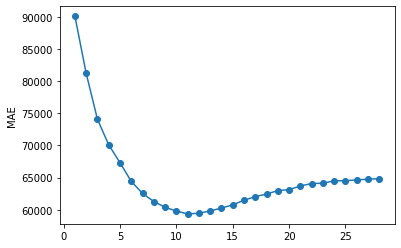

In [22]:
# Se realiza analis de validacion cruzada
from sklearn.metrics import mean_absolute_error

# Para resetear indices
df_train_normalizado.reset_index(drop = True, inplace = True)

from sklearn.model_selection import KFold
cv = KFold(n_splits = 10, shuffle = True, random_state=0) 

total_scores = []
for i in range(2, 30):
   regressor = DecisionTreeRegressor(max_depth=i, random_state=0)
   fold_accuracy = []
   for train_fold, test_fold in cv.split(df_train_normalizado):
      # División train-test aleatoria
      f_train = df_train_normalizado.loc[train_fold]
      f_test = df_train_normalizado.loc[test_fold]
      # Se entrena y ejecuta el modelo
      regressor.fit( X = f_train.drop(['Sale Price'], axis=1), 
                           y = f_train['Sale Price'])
      y_pred = regressor.predict(X = f_test.drop(['Sale Price'], axis = 1))
      # Se evalua el modelo a partir del MAE
      mae = mean_absolute_error(f_test['Sale Price'], y_pred)
      fold_accuracy.append(mae)
   total_scores.append(sum(fold_accuracy)/len(fold_accuracy))

# Se muestran los resultados obtenidos
max_depth = np.argmin(total_scores) + 2
print ('Min Value ' + str(min(total_scores)) +" (" + str(max_depth) + ")")

plt.figure(figsize=(6, 4))
plt.plot(range(1,len(total_scores)+1), total_scores, 
         marker='o')
plt.ylabel('MAE')   

plt.show() 

In [23]:
f_train.reset_index(drop = True, inplace = True)
mejorRegressor = DecisionTreeRegressor(max_depth=12, random_state=0)

mejorRegressor.fit(f_train.drop(['Sale Price'], axis=1), f_train['Sale Price'])
mejorPred_values = regressor.predict(f_test.drop(['Sale Price'], axis=1))

mae = mean_absolute_error(f_test['Sale Price'], mejorPred_values)
print('MAE', mae)


print('R2:', metrics.r2_score(f_test['Sale Price'], mejorPred_values))

print('RMSE:', np.sqrt(metrics.mean_squared_error(f_test['Sale Price'], mejorPred_values)))



/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


MAE 65000.44221676073
R2: 0.6542985655968492
RMSE: 103649.50658487131


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [24]:
## PARA PEARSON:

import statistics
from scipy import stats

mejorRegressor = DecisionTreeRegressor(max_depth=12, random_state=0)

mejorRegressor.fit(df_train_normalizado.drop(['Sale Price'], axis=1), df_train_normalizado['Sale Price'])
mejorPred_values = regressor.predict(df_test_normalizado.drop(['Sale Price'], axis=1))

print(stats.pearsonr(y_test, mejorPred_values)[0])

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


0.6741318500457663


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


SVM DATOS VALIDACION CRUZADA:


In [ ]:
from sklearn.svm import SVR # "Support vector classifier"
from sklearn import svm
model = svm.SVR() #kernel='linear', C=1E10)
model.fit(df_train_normalizado.drop(['Sale Price'], axis=1), df_train_normalizado['Sale Price'])

y_pred = model.predict(df_test_normalizado.drop(['Sale Price'], axis=1))

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(df_test_normalizado['Sale Price'], y_pred))
print('MSE:', metrics.mean_squared_error(df_test_normalizado['Sale Price'], y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(df_test_normalizado['Sale Price'], y_pred)))


In [26]:
from sklearn import neighbors 
from sklearn.model_selection import KFold 
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_absolute_error 
import numpy as np 
from sklearn.svm import SVR 
from sklearn import svm 
 
from sklearn.model_selection import TimeSeriesSplit 
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html 
cv = KFold(n_splits = 10, shuffle = True, random_state=0) 
 
C_arr = [1000] 
eps_arr = [0.0001,0.001] 

total_scores = []
total_scoresr2 = []
total_scoresRMSE = []
 
for C in C_arr: 
   for epsilon in eps_arr: 
       fold_accuracy = [] 
       fold_accuracyR2 = [] 
       fold_accuracyRMSE = [] 

       svr = svm.SVR(kernel='rbf', C=C, epsilon = epsilon) 
       # verificar cada uno de los modelos con validación cruzada. 
       for train_fold, test_fold in cv.split(df_train_normalizado): 
          # División train test aleatoria 
          f_train = df_train_normalizado.loc[train_fold] 
          f_test = df_train_normalizado.loc[test_fold] 
          # entrenamiento y ejecución del modelo 
          svr.fit( X = f_train.drop(['Sale Price'], axis=1),  
                               y = f_train['Sale Price']) 
          y_pred = svr.predict(X = f_test.drop(['Sale Price'], axis = 1)) 
          # evaluación del modelo 
          print("epsilon: ", epsilon)
          print("c: ", C)
          print('mae:', mean_absolute_error(f_test['Sale Price'], y_pred))
          print('R2:', metrics.r2_score(f_test['Sale Price'], y_pred))
          print('RMSE:', np.sqrt(metrics.mean_squared_error(f_test['Sale Price'], y_pred)))
          mae = mean_absolute_error(f_test['Sale Price'], y_pred)
          r2 = metrics.r2_score(f_test['Sale Price'], y_pred)
          rmse = np.sqrt(metrics.mean_squared_error(f_test['Sale Price'], y_pred))

          fold_accuracy.append(mae) 
          fold_accuracyR2.append(r2)
          fold_accuracyRMSE.append(rmse)

       total_scores.append(sum(fold_accuracy)/len(fold_accuracy)) 
       total_scoresr2.append(sum(fold_accuracy)/len(fold_accuracyR2)) 
       total_scoresRMSE.append(sum(fold_accuracy)/len(fold_accuracyRMSE)) 
   

max_depthMAE = np.argmin(total_scores) + 2
print ('Min Value MAE ' + str(max(total_scores)) +" (" + str(max_depthMAE) + ")")
max_depthR2 = np.argmax(total_scores) + 2
print ('Max Value R2' + str(max(total_scoresr2)) +" (" + str(max_depthR2) + ")")
max_depthRMSE = np.argmin(total_scoresRMSE) + 2
print ('Min Value RMSE' + str(max(total_scoresRMSE)) +" (" + str(max_depthRMSE) + ")")
 
plt.figure(figsize=(6, 4))
plt.plot(range(1,len(total_scores)+1), total_scores, 
         marker='o')
plt.ylabel('mae')   

plt.show() 

plt.figure(figsize=(6, 4))
plt.plot(range(1,len(total_scoresr2)+1), total_scoresr2, 
         marker='o')
plt.ylabel('r2')   

plt.show() 

plt.figure(figsize=(6, 4))
plt.plot(range(1,len(total_scoresRMSE)+1), total_scoresRMSE, 
         marker='o')
plt.ylabel('rmse')   

plt.show() 


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/usr/local/lib/pyth

epsilon:  0.0001
c:  1000
mae: 78717.95719718064
R2: 0.5116348796009543
RMSE: 118106.60879874628


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/usr/local/lib/pyth

epsilon:  0.0001
c:  1000
mae: 84496.13877777716
R2: 0.5017393036652846
RMSE: 125357.41397384593


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/usr/local/lib/pyth

epsilon:  0.0001
c:  1000
mae: 79249.97598779248
R2: 0.5168263756807756
RMSE: 119585.26913946937


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/usr/local/lib/pyth

epsilon:  0.0001
c:  1000
mae: 79716.82740820592
R2: 0.5089263265406907
RMSE: 119546.6250983152


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/usr/local/lib/pyth

epsilon:  0.0001
c:  1000
mae: 80286.32665737103
R2: 0.5010304919447937
RMSE: 120846.74147170402


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/usr/local/lib/pyth

epsilon:  0.0001
c:  1000
mae: 81391.68578917823
R2: 0.5069711020546623
RMSE: 123293.30367935177


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/usr/local/lib/pyth

epsilon:  0.0001
c:  1000
mae: 81429.67561426517
R2: 0.5120863927845519
RMSE: 120974.81231665295


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/usr/local/lib/pyth

epsilon:  0.0001
c:  1000
mae: 80539.55232016517
R2: 0.5238521924931179
RMSE: 119580.71425130467


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/usr/local/lib/pyth

epsilon:  0.0001
c:  1000
mae: 80263.13647817104
R2: 0.5113818825806219
RMSE: 120905.6131951007


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/usr/local/lib/pyth

epsilon:  0.0001
c:  1000
mae: 82603.69631732332
R2: 0.5074986695720145
RMSE: 123714.42821638304


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/usr/local/lib/pyth

epsilon:  0.001
c:  1000
mae: 78717.95715520078
R2: 0.5116348801390349
RMSE: 118106.60873368138


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/usr/local/lib/pyth

epsilon:  0.001
c:  1000
mae: 84496.13876453546
R2: 0.5017393039019025
RMSE: 125357.41394408059


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/usr/local/lib/pyth

epsilon:  0.001
c:  1000
mae: 79249.97607472657
R2: 0.5168263753679372
RMSE: 119585.26917818305


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KeyboardInterrupt: ignored

In [27]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor



# Fit regression model
regressors = []
regressors.append(AdaBoostRegressor(DecisionTreeRegressor(max_depth=12, 
                                    criterion='mae'),
                          n_estimators=128, random_state=0))
#http://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html#sphx-glr-auto-examples-ensemble-plot-gradient-boosting-regression-py                         
regressors.append(GradientBoostingRegressor(n_estimators=50, learning_rate=0.25, 
                                            random_state=0, loss='ls'))

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3249: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

MAE: 67673.74033754658
r2: 0.7003605296202404
RMSE: 95148.7780037081


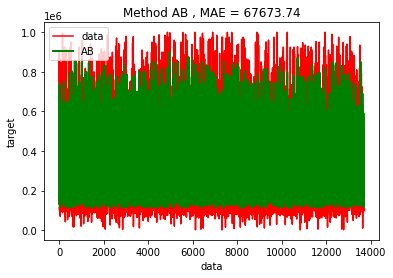

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/pandas/core/g

MAE: 67270.32478771529
r2: 0.694327212216792
RMSE: 96101.92643895301


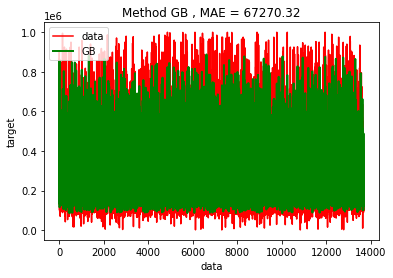

In [28]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

xx = np.stack(i for i in range(len(df_test_normalizado['Sale Price'])))
regr_names = ["AB", "GB"]

results = pd.DataFrame()
results['real'] = df_test_normalizado['Sale Price']
               
for i, r in enumerate(regressors):
    r.fit( X = df_train_normalizado.drop(['Sale Price'], axis=1), y = df_train_normalizado['Sale Price'])
    y = r.predict(X = df_test_normalizado.drop(['Sale Price'], axis = 1))
    results[regr_names[i]] = y
    mae = mean_absolute_error(df_test_normalizado['Sale Price'],y)
    print('MAE:', metrics.mean_absolute_error(df_test_normalizado['Sale Price'], y))
    print('r2:',metrics.r2_score(df_test_normalizado['Sale Price'], y))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(df_test_normalizado['Sale Price'], y)))
    # Plot the results
    plt.figure()
    plt.plot(xx, df_test_normalizado['Sale Price'], c='r', label='data')
    plt.plot(xx, y, c="g", label=regr_names[i], linewidth=2)
    plt.xlabel("data")
    plt.ylabel("target")
    plt.title("Method %s , MAE = %6.2f" % (regr_names[i], mae ))
    plt.axis('tight')
    plt.legend()
    plt.show()